In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('metro-bike-share-trip-data.csv',low_memory=False).sample(n = 30000, random_state = 1)
data.index = range(1,30001)
data

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
1,5050729,960,2016-08-30T11:41:00,2016-08-30T11:57:00,3028.0,34.058319,-118.246090,3035.0,34.048401,-118.260950,6641.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.24609', 'latitude': '34.05...","{'longitude': '-118.26095', 'latitude': '34.04..."
2,4939746,240,2016-08-09T13:00:00,2016-08-09T13:04:00,3019.0,34.038609,-118.260860,3034.0,34.042061,-118.263380,6088.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.26086', 'latitude': '34.03...","{'longitude': '-118.26338', 'latitude': '34.04..."
3,21027767,360,2017-03-01T08:16:00,2017-03-01T08:22:00,3076.0,34.040600,-118.253838,3081.0,34.031891,-118.250183,5838.0,30.0,One Way,Monthly Pass,NaN,"{'longitude': '-118.250183', 'latitude': '34.0..."
4,14263229,1320,2016-11-23T11:31:00,2016-11-23T11:53:00,3067.0,34.045181,-118.250237,3067.0,34.045181,-118.250237,6674.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.250237', 'latitude': '34.0...","{'longitude': '-118.250237', 'latitude': '34.0..."
5,18087294,5400,2017-01-17T17:30:00,2017-01-17T19:00:00,3066.0,34.063389,-118.236160,3057.0,34.035679,-118.270813,6705.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.270813', 'latitude': '34.0..."
6,18151947,420,2017-01-18T20:52:00,2017-01-18T20:59:00,3038.0,34.046822,-118.248352,3042.0,34.049301,-118.238808,6049.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.238808', 'latitude': '34.0..."
7,9791669,240,2016-10-12T18:57:00,2016-10-12T19:01:00,3035.0,34.048401,-118.260948,3067.0,34.045181,-118.250237,5969.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.260948', 'latitude': '34.0...","{'longitude': '-118.250237', 'latitude': '34.0..."
8,13418325,480,2016-11-14T22:48:00,2016-11-14T22:56:00,3055.0,34.044159,-118.251579,3005.0,34.048550,-118.259048,5980.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.251579', 'latitude': '34.0...","{'longitude': '-118.259048', 'latitude': '34.0..."
9,21772763,720,2017-03-10T18:17:00,2017-03-10T18:29:00,3078.0,34.064281,-118.238937,3023.0,34.050911,-118.240967,5868.0,30.0,One Way,Monthly Pass,NaN,"{'longitude': '-118.240967', 'latitude': '34.0..."
10,6264855,2340,2016-09-14T13:49:00,2016-09-14T14:28:00,3014.0,34.056610,-118.237210,3069.0,34.050880,-118.248250,6523.0,0.0,One Way,Walk-up,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.24825', 'latitude': '34.05..."


In [16]:
regex = re.compile('^(\d+-\d+-\d+)T(\d+:\d+:\d+)$')
counter = 1;
lst = []
for stime, etime in zip (data['Start Time'], data ['End Time']):
    m = regex.match(str(stime))
    m2 = regex.match(str(etime))
    
    if (m):
        g2 = m.group(2)
        data.at[counter, 'Start Time'] = pd.to_datetime(m.group(1) + " " + g2)
        lst.append(g2)
    if (m2):
        data.at[counter, 'End Time'] = pd.to_datetime(m2.group(1) + " " + m2.group(2))
    counter += 1
data


,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
1,5050729,960,2016-08-30 11:41:00,2016-08-30 11:57:00,3028.0,34.058319,-118.246090,3035.0,34.048401,-118.260950,6641.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.24609', 'latitude': '34.05...","{'longitude': '-118.26095', 'latitude': '34.04..."
2,4939746,240,2016-08-09 13:00:00,2016-08-09 13:04:00,3019.0,34.038609,-118.260860,3034.0,34.042061,-118.263380,6088.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.26086', 'latitude': '34.03...","{'longitude': '-118.26338', 'latitude': '34.04..."
3,21027767,360,2017-03-01 08:16:00,2017-03-01 08:22:00,3076.0,34.040600,-118.253838,3081.0,34.031891,-118.250183,5838.0,30.0,One Way,Monthly Pass,NaN,"{'longitude': '-118.250183', 'latitude': '34.0..."
4,14263229,1320,2016-11-23 11:31:00,2016-11-23 11:53:00,3067.0,34.045181,-118.250237,3067.0,34.045181,-118.250237,6674.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.250237', 'latitude': '34.0...","{'longitude': '-118.250237', 'latitude': '34.0..."
5,18087294,5400,2017-01-17 17:30:00,2017-01-17 19:00:00,3066.0,34.063389,-118.236160,3057.0,34.035679,-118.270813,6705.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.270813', 'latitude': '34.0..."
6,18151947,420,2017-01-18 20:52:00,2017-01-18 20:59:00,3038.0,34.046822,-118.248352,3042.0,34.049301,-118.238808,6049.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.238808', 'latitude': '34.0..."
7,9791669,240,2016-10-12 18:57:00,2016-10-12 19:01:00,3035.0,34.048401,-118.260948,3067.0,34.045181,-118.250237,5969.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.260948', 'latitude': '34.0...","{'longitude': '-118.250237', 'latitude': '34.0..."
8,13418325,480,2016-11-14 22:48:00,2016-11-14 22:56:00,3055.0,34.044159,-118.251579,3005.0,34.048550,-118.259048,5980.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.251579', 'latitude': '34.0...","{'longitude': '-118.259048', 'latitude': '34.0..."
9,21772763,720,2017-03-10 18:17:00,2017-03-10 18:29:00,3078.0,34.064281,-118.238937,3023.0,34.050911,-118.240967,5868.0,30.0,One Way,Monthly Pass,NaN,"{'longitude': '-118.240967', 'latitude': '34.0..."
10,6264855,2340,2016-09-14 13:49:00,2016-09-14 14:28:00,3014.0,34.056610,-118.237210,3069.0,34.050880,-118.248250,6523.0,0.0,One Way,Walk-up,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.24825', 'latitude': '34.05..."


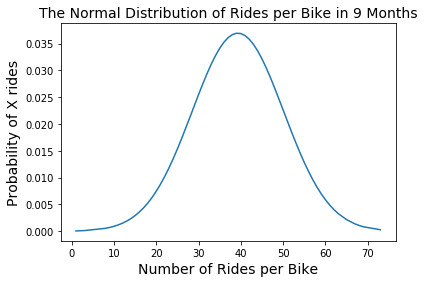

In [4]:
bike_ids = dict()
for id in data['Bike ID'].dropna().unique():
    bike_ids[float(id)] = 0
for data_ids in data['Bike ID'].dropna():
    bike_ids[data_ids] += 1
vals = list(bike_ids.values())
vals.sort()
mean = np.mean(vals)
std = np.std(vals)
pdf = stats.norm.pdf(vals, mean, std)
fig = plt.plot(vals, pdf)
plt.xlabel('Number of Rides per Bike',fontsize= 14)
plt.ylabel('Probability of X rides',fontsize= 14)
plt.title('The Normal Distribution of Rides per Bike in 9 Months', fontsize = 14)
plt.savefig('fig1.png')

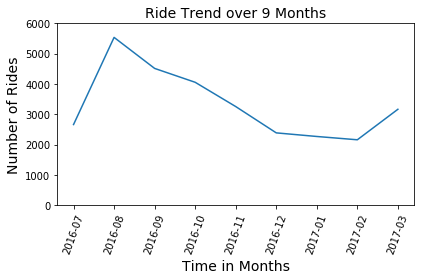

In [5]:
month = []
rides = []
regex = re.compile('^(\d+-\d+)')
copy = data.sort_values(['Start Time'])
copy.index = copy['Start Time']
lst = copy.groupby(pd.Grouper(freq='M')).size()
for k,v in lst.iteritems():
    m = regex.match(str(k))
    month.append(m.group(1))
    rides.append(v)
month
fig = plt.plot(month,rides)
plt.xlabel('Time in Months',fontsize= 14)
plt.ylabel('Number of Rides',fontsize= 14)
plt.xticks(rotation=70)
plt.ylim([0,6000])
plt.title('Ride Trend over 9 Months', fontsize = 14)
plt.tight_layout()
plt.savefig('fig2.png')

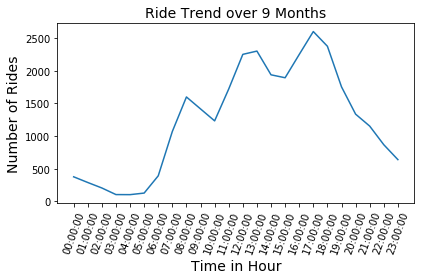

In [39]:
regex = re.compile('(\d+:\d+:\d+)')
counter = 1;
lst = []
hour = []
count = []
for stime in data['Start Time']:
    m = regex.search(str(stime))
    if m:
        lst.append(pd.to_datetime(m.group(1)))
copy.index = pd.Series(lst)
dis = copy.groupby(pd.Grouper(freq='H')).size()
for k,v in dis.iteritems():
    m = regex.search(str(k))
    hour.append(m.group(1))
    count.append(v)
fig = plt.plot(hour,count)
plt.xlabel('Time in Hour',fontsize= 14)
plt.ylabel('Number of Rides',fontsize= 14)
plt.xticks(rotation=70)
plt.title('Ride Trend over 9 Month', fontsize = 14)
plt.tight_layout()
plt.savefig('fig5.png')

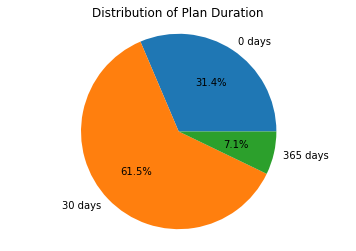

In [6]:
plan_lst = data.groupby(['Plan Duration']).size()
plans = []
counts = list(plan_lst.values)
for p in list(plan_lst.index):
    plans.append(str(int(p)) + ' days')
plt.title('Distribution of Plan Duration')
plt.pie(counts, labels=plans, autopct='%1.1f%%')
plt.axis('equal') 
plt.savefig('fig3.png')
plt.show()


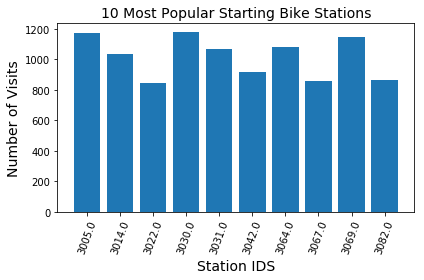

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
1,5050729,960,2016-08-30 11:41:00,2016-08-30 11:57:00,3028.0,34.058319,-118.246090,3035.0,34.048401,-118.260950,6641.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.24609', 'latitude': '34.05...","{'longitude': '-118.26095', 'latitude': '34.04..."
2,4939746,240,2016-08-09 13:00:00,2016-08-09 13:04:00,3019.0,34.038609,-118.260860,3034.0,34.042061,-118.263380,6088.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.26086', 'latitude': '34.03...","{'longitude': '-118.26338', 'latitude': '34.04..."
3,21027767,360,2017-03-01 08:16:00,2017-03-01 08:22:00,3076.0,34.040600,-118.253838,3081.0,34.031891,-118.250183,5838.0,30.0,One Way,Monthly Pass,NaN,"{'longitude': '-118.250183', 'latitude': '34.0..."
4,14263229,1320,2016-11-23 11:31:00,2016-11-23 11:53:00,3067.0,34.045181,-118.250237,3067.0,34.045181,-118.250237,6674.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.250237', 'latitude': '34.0...","{'longitude': '-118.250237', 'latitude': '34.0..."
5,18087294,5400,2017-01-17 17:30:00,2017-01-17 19:00:00,3066.0,34.063389,-118.236160,3057.0,34.035679,-118.270813,6705.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.270813', 'latitude': '34.0..."
6,18151947,420,2017-01-18 20:52:00,2017-01-18 20:59:00,3038.0,34.046822,-118.248352,3042.0,34.049301,-118.238808,6049.0,0.0,One Way,Walk-up,NaN,"{'longitude': '-118.238808', 'latitude': '34.0..."
7,9791669,240,2016-10-12 18:57:00,2016-10-12 19:01:00,3035.0,34.048401,-118.260948,3067.0,34.045181,-118.250237,5969.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.260948', 'latitude': '34.0...","{'longitude': '-118.250237', 'latitude': '34.0..."
8,13418325,480,2016-11-14 22:48:00,2016-11-14 22:56:00,3055.0,34.044159,-118.251579,3005.0,34.048550,-118.259048,5980.0,30.0,One Way,Monthly Pass,"{'longitude': '-118.251579', 'latitude': '34.0...","{'longitude': '-118.259048', 'latitude': '34.0..."
9,21772763,720,2017-03-10 18:17:00,2017-03-10 18:29:00,3078.0,34.064281,-118.238937,3023.0,34.050911,-118.240967,5868.0,30.0,One Way,Monthly Pass,NaN,"{'longitude': '-118.240967', 'latitude': '34.0..."
10,6264855,2340,2016-09-14 13:49:00,2016-09-14 14:28:00,3014.0,34.056610,-118.237210,3069.0,34.050880,-118.248250,6523.0,0.0,One Way,Walk-up,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.24825', 'latitude': '34.05..."


In [7]:
start_loc = data.groupby(['Starting Station ID']).size()
start_loc = start_loc.sort_values(ascending = False)

top = start_loc.head(10)
total = start_loc.sum()
top = top.sort_index()
index = list(top.index)
val = list(top.values)
plt.bar(np.arange(10),val)
plt.xticks(np.arange(10), index, rotation = 70)
plt.title('10 Most Popular Starting Bike Stations',fontsize= 14)
plt.xlabel('Station IDS',fontsize= 14)
plt.ylabel('Number of Visits',fontsize= 14)
plt.tight_layout()

plt.savefig('fig4.png')
plt.show()
data

In [8]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 #km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [9]:
loc = data.where(data['Trip Route Category'] == 'One Way').dropna()
slat_lon = []
elat_lon = []
dist = []
for index, row in loc.iterrows():
    slat_lon.append((row['Starting Station Latitude'],row['Starting Station Longitude']))
    elat_lon.append((row['Ending Station Latitude'],row['Ending Station Longitude']))
for o,d in zip(slat_lon,elat_lon):
    dist.append(distance(o,d))
np.mean(dist)

9.342774935982419

In [10]:
df = pd.read_csv('metro-bike-share-trip-data.csv',low_memory=False)
df = data.groupby(['Passholder Type']).size()
df

Passholder Type
Flex Pass        2129
Monthly Pass    18414
Staff Annual       89
Walk-up          9368
dtype: int64